# Exploring Weather Trends

We would like to understand how the temperature of New York has been changed during the past 250 years compared with the global temperature by looking at 10-year moving average data plotted by a line chart. The tool used here is Python.

## Questions

- Question 1) What was the temperature range for each?


- Question 2) What is the average temperature gap?


- Question 3) Can we decrease the gap soon?

## Data gathering

Get the data from database by writing SQL query. 

The query executed without error and pulls the intended data with CSV format. 

Find the moving average on the Spreadsheet. Select 10 cells and find average and copy & paste all the way down.

`(*Captured images are attached on the last page.)`

## Data cleaning

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
dfg = pd.read_csv('global_data.csv')
dfg.head()

,year,avg_temp,10-Years MA
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN


In [3]:
dfg.isnull().sum()

year           0
avg_temp       0
10-Years MA    9
dtype: int64

In [4]:
dfg = dfg.dropna()
dfg.isnull().sum()

year           0
avg_temp       0
10-Years MA    0
dtype: int64

In [5]:
dfc = pd.read_csv('city_data.csv')
dfc.head()

,year,city,country,avg_temp,10-Years MA
0,1849,Abidjan,C??te D'Ivoire,25.58,NaN
1,1850,Abidjan,C??te D'Ivoire,25.52,NaN
2,1851,Abidjan,C??te D'Ivoire,25.67,NaN
3,1852,Abidjan,C??te D'Ivoire,NaN,NaN
4,1853,Abidjan,C??te D'Ivoire,NaN,NaN


In [6]:
dfc.isnull().sum()

year               0
city               0
country            0
avg_temp        2547
10-Years MA    70530
dtype: int64

In [7]:
dfc = dfc.dropna()
dfc.isnull().sum()

year           0
city           0
country        0
avg_temp       0
10-Years MA    0
dtype: int64

In [8]:
dfc.tail()

,year,city,country,avg_temp,10-Years MA
46434,2009,New York,United States,10.14,10.60
46435,2010,New York,United States,11.36,10.74
46436,2011,New York,United States,11.27,10.77
46437,2012,New York,United States,11.97,10.84
46438,2013,New York,United States,12.16,11.08


In [9]:
dp = np.arange(46177, 46184, 1)
dfc = dfc.drop(index = dp)

In [10]:
dfc.describe()

,year,avg_temp,10-Years MA
count,254.000000,254.000000,254.000000
mean,1886.417323,9.521220,9.470000
std,73.599702,1.011606,0.601472
min,1759.000000,0.250000,7.730000
25%,1823.250000,9.092500,9.100000
50%,1886.500000,9.550000,9.440000
75%,1949.750000,10.027500,9.885000
max,2013.000000,12.160000,11.080000


In [11]:
dfg.describe()

,year,avg_temp,10-Years MA
count,257.000000,257.000000,257.000000
mean,1887.000000,8.381206,8.353961
std,74.333707,0.559981,0.452483
min,1759.000000,6.780000,7.203000
25%,1823.000000,8.090000,8.059000
50%,1887.000000,8.370000,8.275000
75%,1951.000000,8.700000,8.642000
max,2015.000000,9.830000,9.594000


In [12]:
dfc.describe() - dfg.describe()

,year,avg_temp,10-Years MA
count,-3.000000,-3.000000,-3.000000
mean,-0.582677,1.140014,1.116039
std,-0.734006,0.451625,0.148989
min,0.000000,-6.530000,0.527000
25%,0.250000,1.002500,1.041000
50%,-0.500000,1.180000,1.165000
75%,-1.250000,1.327500,1.243000
max,-2.000000,2.330000,1.486000


In [39]:
dfc.loc[197]

index                  46382
year                    1957
city                New York
country        United States
avg_temp                10.5
10-Years MA            10.39
Name: 197, dtype: object

## Visualization

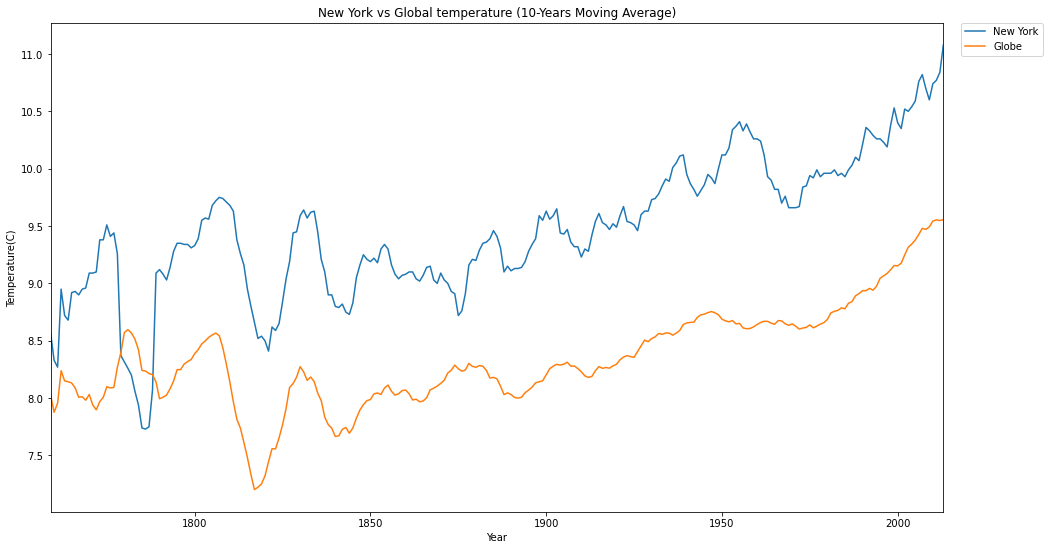

In [13]:
plt.figure(figsize = [16,9])

plt.errorbar(x = dfc['year'], y = dfc['10-Years MA'], label = 'New York')
plt.errorbar(x = dfg['year'], y = dfg['10-Years MA'], label = 'Globe')

plt.legend(bbox_to_anchor=(1.02,1), loc = 'upper left', borderaxespad = 0)

plt.title('New York vs Global temperature (10-Years Moving Average)')
plt.xlabel('Year')
plt.ylabel('Temperature(C)')
plt.xlim(1759,2013)

plt.show()

Because there is a categorical variable, year, and a quantitative variable, temperature, I selected two line charts in the same plot. I also added a legend meaning each data with different colors. 

(1) both lines curve upward over the experimental years by and large. 

(2) however, the temperature of New York were below the global average for only about 30 years between 1750 and 1800, 

(3) temperature gap has been around 1.12 Celsius degree since then without reversing each other. 

(4) the gap was the largest in 1957. 

## Answer

- Question 1) What was the temperature range for each(City/Globe)? **7.73 ~ 11.08 (C) / 7.20 ~ 9.59 (C)**


- Question 2) What is the average temperature gap? **1.12 (C)**


- Question 3) Can we find decreasing the gap soon? **No, the gap is increasing.**

## Appendix

Refer to the next page.